In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
# data processing, CSV file I/O (e.g. pd.read_csv)

#visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from plotly import tools
import seaborn as sns
import missingno as msno
#for visualizing missing data
pd.set_option('display.max_columns', None)

sns.set()

In [2]:
train=pd.read_excel('/content/drive/MyDrive/Projects/superstore_sales.xlsx')

In [3]:
train

order_id order_date  ship_date       ship_mode  \
0         AG-2011-2040 2011-01-01 2011-01-06  Standard Class   
1        IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
2         HU-2011-1220 2011-01-01 2011-01-05    Second Class   
3      IT-2011-3647632 2011-01-01 2011-01-05    Second Class   
4        IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
...                ...        ...        ...             ...   
51285   CA-2014-115427 2014-12-31 2015-01-04  Standard Class   
51286     MO-2014-2560 2014-12-31 2015-01-05  Standard Class   
51287   MX-2014-110527 2014-12-31 2015-01-02    Second Class   
51288   MX-2014-114783 2014-12-31 2015-01-06  Standard Class   
51289   CA-2014-156720 2014-12-31 2015-01-04  Standard Class   

          customer_name      segment             state        country  market  \
0       Toby Braunhardt     Consumer       Constantine        Algeria  Africa   
1           Joseph Holt     Consumer   New South Wales      Australia    APAC   
2         Annie Thurman     Consumer          Budapest        Hungary    EMEA   
3          Eugene Moren  Home Office         Stockholm         Sweden      EU   
4           Joseph Holt     Consumer   New South Wales      Australia    APAC   
...                 ...          ...               ...            ...     ...   
51285        Erica Bern    Corporate        California  United States      US   
51286         Liz Preis     Consumer  Souss-Massa-Draâ        Morocco  Africa   
51287  Charlotte Melton     Consumer           Managua      Nicaragua   LATAM   
51288     Tamara Dahlen     Consumer         Chihuahua         Mexico   LATAM   
51289     Jill Matthias     Consumer          Colorado  United States      US   

        region        product_id         category sub_category  \
0       Africa  OFF-TEN-10000025  Office Supplies      Storage   
1      Oceania   OFF-SU-10000618  Office Supplies     Supplies   
2         EMEA  OFF-TEN-10001585  Office Supplies      Storage   
3        North   OFF-PA-10001492  Office Supplies        Paper   
4      Oceania   FUR-FU-10003447        Furniture  Furnishings   
...        ...               ...              ...          ...   
51285     West   OFF-BI-10002103  Office Supplies      Binders   
51286   Africa  OFF-WIL-10001069  Office Supplies      Binders   
51287  Central   OFF-LA-10004182  Office Supplies       Labels   
51288    North   OFF-LA-10000413  Office Supplies       Labels   
51289     West   OFF-FA-10003472  Office Supplies    Fasteners   

                                          product_name    sales  quantity  \
0                                  Tenex Lockers, Blue  408.300         2   
1                             Acme Trimmer, High Speed  120.366         3   
2                              Tenex Box, Single Width   66.120         4   
3                          Enermax Note Cards, Premium   44.865         3   
4                           Eldon Light Bulb, Duo Pack  113.670         5   
...                                                ...      ...       ...   
51285  Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl   13.904         2   
51286          Wilson Jones Hole Reinforcements, Clear    3.990         1   
51287           Hon Color Coded Labels, 5000 Label Set   26.400         3   
51288           Hon Legal Exhibit Labels, Alphabetical    7.120         1   
51289                              Bagged Rubber Bands    3.024         3   

       discount    profit  shipping_cost order_priority  year  
0           0.0  106.1400         35.460         Medium  2011  
1           0.1   36.0360          9.720         Medium  2011  
2           0.0   29.6400          8.170           High  2011  
3           0.5  -26.0550          4.820           High  2011  
4           0.1   37.7700          4.700         Medium  2011  
...         ...       ...            ...            ...   ...  
51285       0.2    4.5188          0.890         Medium  2014  
51286       0.0    0.4200          0.490  

# Reorder columns: move 'sales' to the last position

In [4]:
columns = list(train.columns)
columns.remove('sales')  # Remove 'sales' from its current position
columns.append('sales')  # Append 'sales' at the end

# Reassign DataFrame with new column order (data types remain unchanged)
train = train[columns]

# Verify the new order
print(train.dtypes)  # Ensures data types are unchanged

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
sales                    float64
dtype: object


# Basic Informatiom of our data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  quantity        51290 non-null  int64         
 15  di

# Checking Duplicates

In [6]:
train.duplicated().sum()

0

In [7]:
print(f'Duplicates in application data : {train.iloc[:,1:].duplicated().sum()}, ({np.round(100*train.iloc[:,1:].duplicated().sum()/len(train),1)}%)')
print('')

Duplicates in application data : 0, (0.0%)



# No Duplicate Entries

# Checking null values()

In [8]:
train.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
sales             0
dtype: int64

# Checking unique values()

In [9]:
for i in train.columns:
  print({i:train[i].unique()})

{'order_id': array(['AG-2011-2040', 'IN-2011-47883', 'HU-2011-1220', ...,
       'MX-2014-108574', 'MO-2014-2560', 'CA-2014-156720'], dtype=object)}
{'order_date': <DatetimeArray>
['2011-01-01 00:00:00', '2011-01-02 00:00:00', '2011-01-03 00:00:00',
 '2011-01-04 00:00:00', '2011-01-05 00:00:00', '2011-01-06 00:00:00',
 '2011-01-07 00:00:00', '2011-01-08 00:00:00', '2011-01-09 00:00:00',
 '2011-01-10 00:00:00',
 ...
 '2014-12-22 00:00:00', '2014-12-23 00:00:00', '2014-12-24 00:00:00',
 '2014-12-25 00:00:00', '2014-12-26 00:00:00', '2014-12-27 00:00:00',
 '2014-12-28 00:00:00', '2014-12-29 00:00:00', '2014-12-30 00:00:00',
 '2014-12-31 00:00:00']
Length: 1430, dtype: datetime64[ns]}
{'ship_date': <DatetimeArray>
['2011-01-06 00:00:00', '2011-01-08 00:00:00', '2011-01-05 00:00:00',
 '2011-01-03 00:00:00', '2011-01-09 00:00:00', '2011-01-07 00:00:00',
 '2011-01-11 00:00:00', '2011-01-10 00:00:00', '2011-01-13 00:00:00',
 '2011-01-12 00:00:00',
 ...
 '2014-12-29 00:00:00', '2014-12-30 00:00

In [10]:
descriptive_stats = train.describe(include='all')

# Display the descriptive statistics
print(descriptive_stats)


# More specific descriptive statistics for different data types
numerical_cols = train.select_dtypes(include=['number']).columns
categorical_cols = train.select_dtypes(include=['object', 'category']).columns


print("\nDescriptive Statistics for Numerical Columns:")
print(train[numerical_cols].describe())

print("\nDescriptive Statistics for Categorical Columns:")
print(train[categorical_cols].describe())



              order_id                     order_date  \
count            51290                          51290   
unique           25035                            NaN   
top     CA-2014-100111                            NaN   
freq                14                            NaN   
mean               NaN  2013-05-11 21:26:49.155780864   
min                NaN            2011-01-01 00:00:00   
25%                NaN            2012-06-19 00:00:00   
50%                NaN            2013-07-08 00:00:00   
75%                NaN            2014-05-22 00:00:00   
max                NaN            2014-12-31 00:00:00   
std                NaN                            NaN   

                            ship_date       ship_mode    customer_name  \
count                           51290           51290            51290   
unique                            NaN               4              795   
top                               NaN  Standard Class  Muhammed Yedwab   
freq               

 Key Observations:

Orders are highly concentrated in the United States, especially in California.
The APAC region has the highest number of orders, indicating strong demand.
"Standard Class" is the most used shipping mode, suggesting customers prioritize cost over speed.
Office Supplies dominate the market, especially Binders and Staples.
Some customers place multiple orders, and some products are frequent best-sellers.
 Key Business Insights
 High Variability in Profit

Some orders generate large profits, while others result in heavy losses.
Losses could be due to high discounts or high shipping costs.
 Discount Strategy Needs Optimization

Most discounts are low (0-20%), but some reach 85%.
Orders with huge discounts might be unprofitable and need better pricing strategies.
 Shipping Cost is Highly Variable

Some orders pay nearly $0 in shipping, while others pay over $900.
Reducing high shipping costs can improve profit margins.
 Sales are Skewed

Most orders have moderate sales ($30-$250).
Some orders exceed $22,000, likely due to bulk purchases or expensive items.
 Key Customers and Repeat Orders

Some customers, like Muhammed Yedwab, place frequent orders.
A customer loyalty program could boost repeat purchases.
 Regional and Product Trends

California, APAC, and Central regions dominate orders.
Office Supplies and Binders are best-sellers.
Targeted marketing for top regions and products can maximize revenue.
. Recommendations for Business Growth
Reduce Losses on High-Discount Orders

Identify unprofitable discounts and set a minimum profit margin.
Optimize Shipping Costs

Encourage bulk orders to reduce shipping costs per unit.
Partner with logistics providers for cheaper shipping.
Focus on Profitable Products & Regions

Expand marketing in APAC & California where demand is high.
Promote best-selling products (Binders, Staples).
Customer Loyalty Program

Reward repeat customers like Muhammed Yedwab.
Offer exclusive discounts for high-value customers.
Segment Customers for Personalized Marketing

Offer different promotions for Consumers, Corporate, and Home Office.
Final Summary
 Profitable Segments: APAC region, Office Supplies, Standard Class shipping.
 Risk Areas: High shipping costs, huge discounts leading to losses.
 Opportunities: Improve pricing strategy, optimize logistics, focus on high-revenue customers.

# Value_counts for Categorical features

In [11]:
for j in  train.columns:
  print(f'\nValue Counts for:{j}:')
  print(train[j].value_counts())


Value Counts for:order_id:
order_id
CA-2014-100111    14
MX-2014-166541    13
TO-2014-9950      13
NI-2014-8880      13
IN-2013-42311     13
                  ..
PL-2013-7560       1
US-2013-144050     1
CA-2013-138933     1
US-2013-165022     1
CA-2014-156720     1
Name: count, Length: 25035, dtype: int64

Value Counts for:order_date:
order_date
2014-06-18    135
2014-11-18    127
2014-09-03    126
2014-11-20    118
2014-12-29    116
             ... 
2013-01-13      1
2013-11-10      1
2011-01-02      1
2012-05-27      1
2014-03-23      1
Name: count, Length: 1430, dtype: int64

Value Counts for:ship_date:
ship_date
2014-11-22    130
2014-09-07    115
2014-11-17    101
2014-12-07    101
2014-11-29    100
             ... 
2011-04-14      3
2011-01-25      3
2011-01-03      2
2011-01-05      2
2011-01-06      2
Name: count, Length: 1464, dtype: int64

Value Counts for:ship_mode:
ship_mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701


# EDA (Exploratry Data Analysis )

# Category -- order_priority

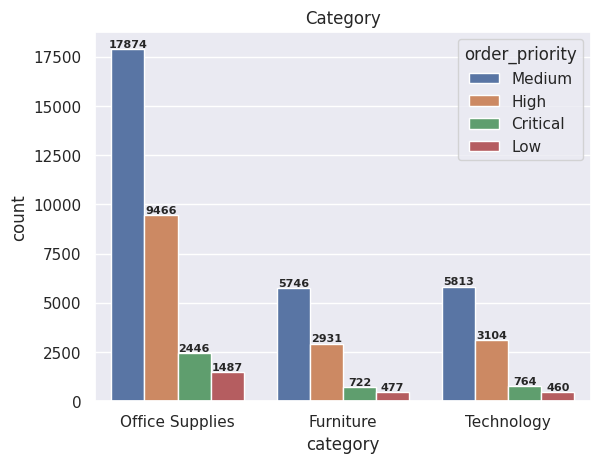

In [12]:
ax=sns.countplot(x=train['category'],hue=train['order_priority'])
plt.xticks(rotation=0)
plt.title('Category')
plt.gca()
for container in ax.containers:
  ax.bar_label(container, fmt='%d',label_type='edge',fontsize=8,fontweight='bold')
plt.show()

# Sub-Category

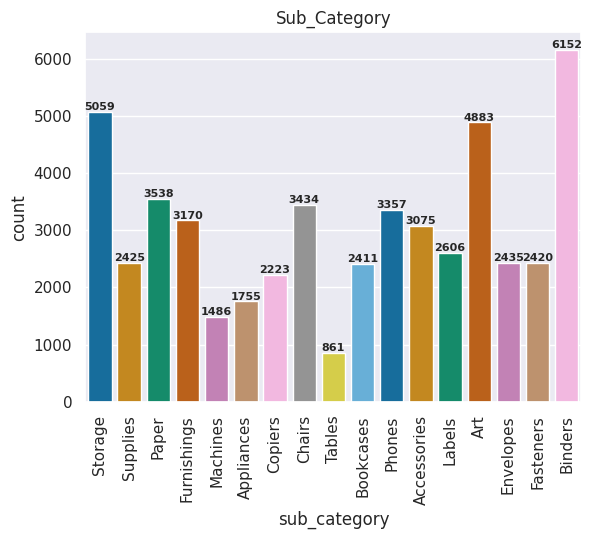

In [13]:
ap=sns.countplot(x=train['sub_category'],palette='colorblind')
plt.xticks(rotation=90)
plt.title('Sub_Category')
plt.gca()
for container in ap.containers:
  ap.bar_label(container, fmt='%d',label_type='edge',fontsize=8,fontweight='bold')

# Scatter plot () Discount -- Sales

<Axes: xlabel='discount', ylabel='profit'>

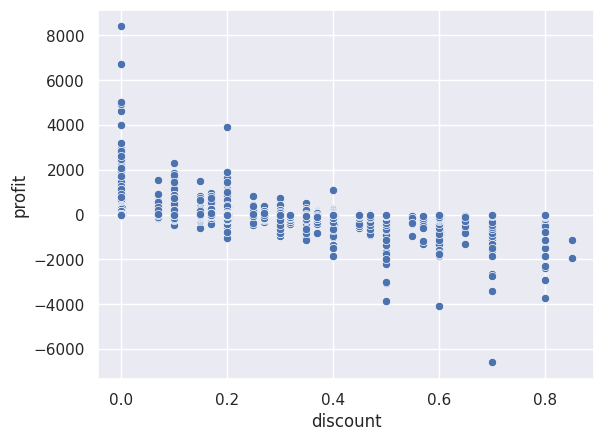

In [14]:
sns.scatterplot(x=train['discount'],y=train['profit'])

Analysis of the Scatter Plot (Discount vs. Profit)
1. Understanding the Plot
X-Axis: Discount (values between 0 and ~0.8)
Y-Axis: Profit (values ranging from ~ -6000 to ~ 8000)
Plot Type: Scatter plot, showing the relationship between discount and profit.
2. Key Observations
 Negative Trend:

As the discount increases, the profit tends to decrease.
This suggests that offering higher discounts may lead to lower or even negative profits.
 High Variability in Profit at Lower Discounts:

When discount is 0, profits vary widely (from negative values to above 8000).
This suggests that not offering a discount can sometimes result in both high gains and high losses, depending on other factors like product cost, demand, or operational efficiency.
 Consistently Negative Profit at Higher Discounts (>0.5):

When discounts exceed 50% (0.5), most profits are negative.
This indicates that excessive discounting is often unsustainable and results in losses.
 Outliers:

A few extreme points where profit is very high even with low discount.
Some extreme negative profits at mid-to-high discounts.
3. Possible Business Insights
 Discount Optimization is Needed:

Businesses may need to reassess their discount strategy, as aggressive discounting may not always be profitable.
 Customer Behavior & Product Types Matter:

Not all products may follow this trend. Some might still generate profit at higher discounts, while others may not.
 Investigate High Loss Cases:

The negative profit spikes could be linked to specific products, high cost, or poor sales volume.


# Scatter-Plot () Sales -- Profit

<Axes: xlabel='sales', ylabel='profit'>

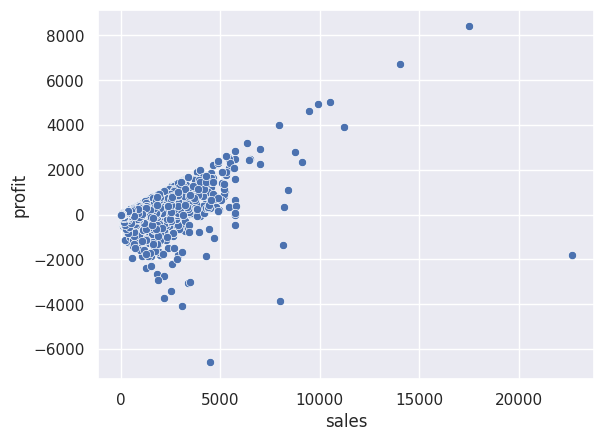

In [15]:
sns.scatterplot(x=train['sales'],y=train['profit'])

Analysis of the Scatter Plot (Sales vs. Profit)
1. Understanding the Plot
X-Axis: Sales (values from 0 to ~22,000)
Y-Axis: Profit (values from ~ -6000 to ~8000)
Plot Type: Scatter plot, showing the relationship between sales and profit.
2. Key Observations
Positive Correlation:

As sales increase, profit also tends to increase.
This is expected, as higher sales usually contribute to higher profits.
 High Density at Low Sales:

The majority of data points are concentrated in the lower sales range (0-5000).
This suggests that most transactions have relatively lower sales amounts.
 Profit Variability at Low Sales:

Some low-sales transactions result in high profit, while others show significant losses.
This could be due to product type, cost structure, or discounts.
 Outliers:

Some extreme points where sales are high (~20,000) but profit is still low or negative.
A few cases where sales are moderate (~10,000) but profit is very high (~8000).
These may need further investigation.
3. Business Insights
 Sales Alone Doesn’t Guarantee Profit:

While higher sales often lead to profit, some transactions still show losses despite high sales.
 Profitability Optimization Needed:

Investigate low-profit or loss-making transactions.
Consider reducing discount levels or optimizing cost structures.
 Analyze Product Categories:

Some products might have higher profit margins even at lower sales.
Others might be high sales but low margin, requiring a pricing review.

# Sales Trend

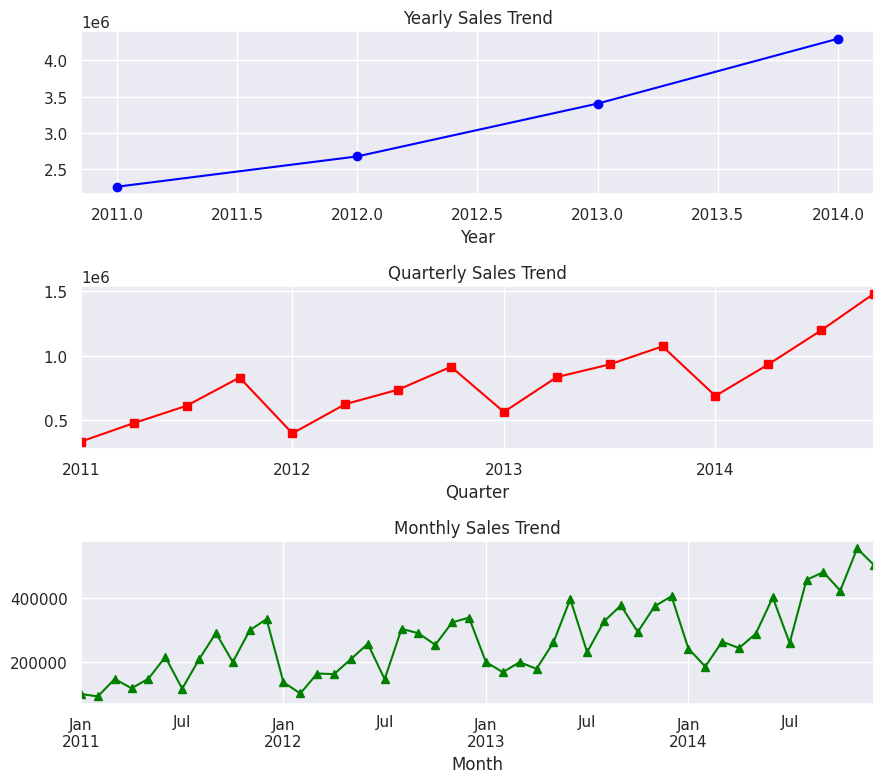

In [16]:
# Ensure 'Order Date' is in datetime format
train['order_date'] = pd.to_datetime(train['order_date'])

# Extract Year, Quarter, and Month
train['Year'] = train['order_date'].dt.year
train['Quarter'] = train['order_date'].dt.to_period('Q')  # Converts to Quarter format
train['Month'] = train['order_date'].dt.to_period('M')    # Converts to Month format

# Aggregate sales based on time periods
train_yearly = train.groupby('Year')['sales'].sum()
train_quarterly = train.groupby('Quarter')['sales'].sum()
train_monthly = train.groupby('Month')['sales'].sum()

# Create Subplots
fig, axes = plt.subplots(3, 1, figsize=(9, 8))  # 3 rows, 1 column

# Yearly Sales Plot
train_yearly.plot(kind='line', marker='o', color='blue', ax=axes[0])
axes[0].set_title('Yearly Sales Trend')

# Quarterly Sales Plot
train_quarterly.plot(kind='line', marker='s', color='red', ax=axes[1])
axes[1].set_title('Quarterly Sales Trend')

# Monthly Sales Plot
train_monthly.plot(kind='line', marker='^', color='green', ax=axes[2])
axes[2].set_title('Monthly Sales Trend')

plt.tight_layout()
plt.show()


# Shipping days_difference

In [17]:
train['shiping_days']=(train['ship_date']-train['order_date']).dt.days

def rating_shipment(days):
  if days <= 2:
    return 'Fastest'
  elif days > 2 and days <=5:
    return 'Fast'
  elif days >5 and days <=7:
    return 'Good'
  elif days >7 and days <=10:
    return 'Average'
  else :
    return 'slow'
train['rating_shipment']=train['shiping_days'].apply(rating_shipment)

# Calculating cost

In [18]:
train['cost']=(train['sales']-train['profit'])

In [19]:
train['Loss'] = train['profit'].apply(lambda x: -x if x < 0 else 0)

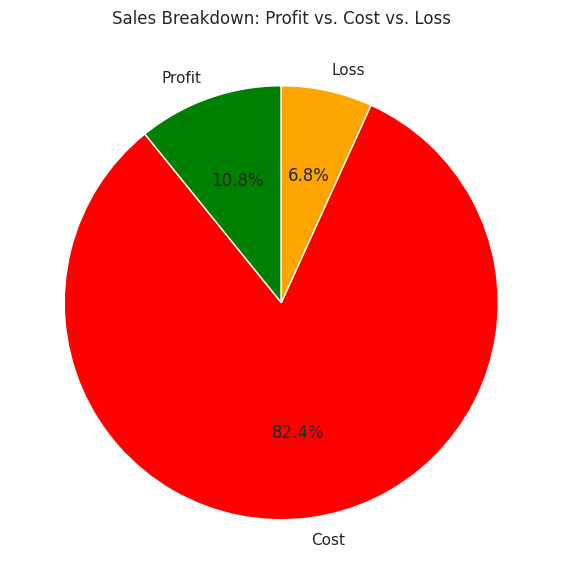

In [20]:
labels = ['Profit', 'Cost', 'Loss']
sizes = [train['profit'].sum(), train['cost'].sum(), train['Loss'].sum()]
colors = ['green', 'red', 'orange']

plt.figure(figsize=(7,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Sales Breakdown: Profit vs. Cost vs. Loss")
plt.show()


In [21]:
train.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority', 'year', 'sales', 'Year',
       'Quarter', 'Month', 'shiping_days', 'rating_shipment', 'cost', 'Loss'],
      dtype='object')

<Axes: >

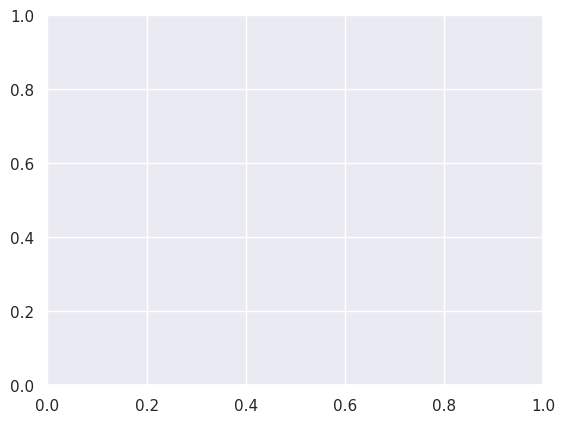

In [22]:
sns.countplot()

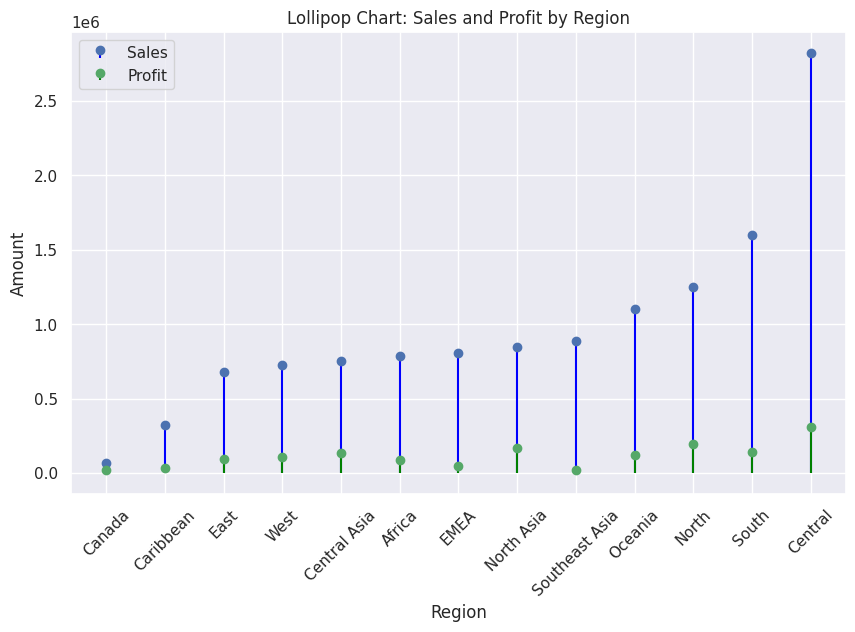

In [23]:
# Grouping data by region
region_data = train.groupby('region')[['sales', 'profit']].sum().reset_index()


region_data = region_data.sort_values(by='sales', ascending=True)


plt.figure(figsize=(10,6))

plt.stem(region_data['region'], region_data['sales'], linefmt='blue', markerfmt='bo', basefmt=" ")


plt.stem(region_data['region'], region_data['profit'], linefmt='green', markerfmt='go', basefmt=" ")

plt.xlabel("Region")
plt.ylabel("Amount")
plt.title("Lollipop Chart: Sales and Profit by Region")
plt.xticks(rotation=45)
plt.legend(["Sales", "Profit"])

plt.show()


In [24]:
import plotly.express as px
import pandas as pd

# Grouping data by country and region
country_sales = train.groupby(['country', 'region'])[['sales']].sum().reset_index()

# Creating Choropleth Map
fig = px.choropleth(
    country_sales,
    locations="country",  # Column with country names
    locationmode="country names",  # Recognizes country names
    color="sales",  # Sales data for color intensity
    hover_name="country",  # Shows country on hover
    hover_data=["region", "sales"],  # Shows region and sales on hover
    title="Sales by Region and Country",
    color_continuous_scale="Greens",  # Color theme
)

# Updating Layout to Add Legend
fig.update_layout(
    coloraxis_colorbar=dict(
        title="Sales",  # Title for the legend
        tickprefix="$",  # Add dollar sign prefix
    )
)

# Show the map
fig.update_layout(geo=dict(showframe=False, showcoastlines=False, projection_type="natural earth"))
fig.show()


# Tree maps

In [25]:
# Aggregating sales by Category and Sub-Category
category_sales = train.groupby(['category', 'sub_category'])[['sales']].sum().reset_index()

# Creating Treemap
fig = px.treemap(
    category_sales,
    path=['category', 'sub_category'],  # Hierarchy: Category → Sub-Category
    values='sales',  # Box size based on sales
    color='sales',  # Color intensity based on sales
    color_continuous_scale='Cividis',  # Color theme
    title="Sales by Category and Sub-Category"
)

# Show the treemap
fig.show()


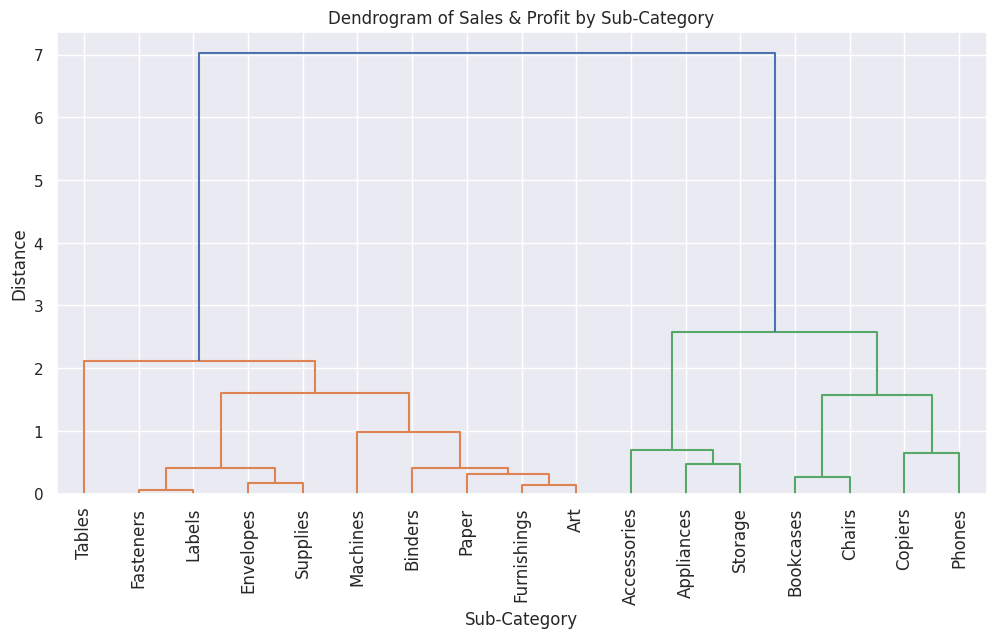

In [26]:
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Selecting relevant columns for clustering
data = train[['category', 'sub_category', 'sales', 'profit']]

# Aggregating sales and profit by category and sub-category
data_grouped = data.groupby(['category', 'sub_category'])[['sales', 'profit']].sum().reset_index()

# Scaling data (important for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_grouped[['sales', 'profit']])

# Creating Dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'), labels=data_grouped['sub_category'].values)
plt.title("Dendrogram of Sales & Profit by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Distance")
plt.xticks(rotation=90)
plt.show()


In [27]:
train.head(2)

order_id order_date  ship_date       ship_mode    customer_name  \
0   AG-2011-2040 2011-01-01 2011-01-06  Standard Class  Toby Braunhardt   
1  IN-2011-47883 2011-01-01 2011-01-08  Standard Class      Joseph Holt   

    segment            state    country  market   region        product_id  \
0  Consumer      Constantine    Algeria  Africa   Africa  OFF-TEN-10000025   
1  Consumer  New South Wales  Australia    APAC  Oceania   OFF-SU-10000618   

          category sub_category              product_name  quantity  discount  \
0  Office Supplies      Storage       Tenex Lockers, Blue         2       0.0   
1  Office Supplies     Supplies  Acme Trimmer, High Speed         3       0.1   

    profit  shipping_cost order_priority  year    sales  Year Quarter  \
0  106.140          35.46         Medium  2011  408.300  2011  2011Q1   
1   36.036           9.72         Medium  2011  120.366  2011  2011Q1   

     Month  shiping_days rating_shipment    cost  Loss  
0  2011-01             5            Fast  302.16   0.0  
1  2011-01             7            Good   84.33   0.0

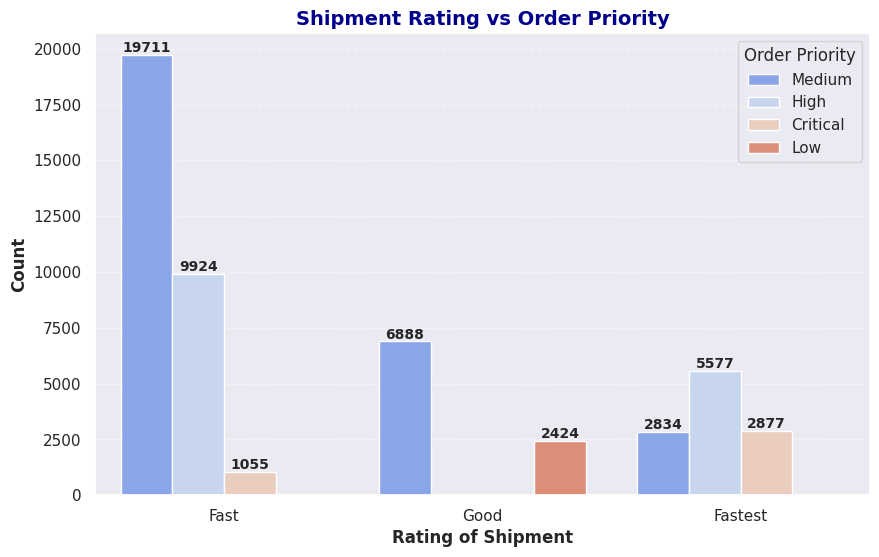

In [28]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=train['rating_shipment'], hue=train['order_priority'], palette='coolwarm')
plt.xticks(rotation=0)

# Title & Labels
plt.title('Shipment Rating vs Order Priority', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Rating of Shipment", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')

# Add count labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, fontweight='bold')

plt.legend(title="Order Priority", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


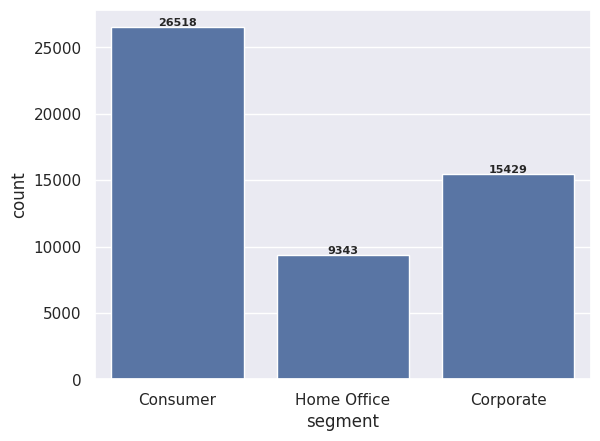

In [29]:
train['segment'].value_counts()
aw=sns.countplot(x=train['segment'])

for container in aw.containers:
  aw.bar_label(container, fmt='%d',label_type='edge',fontsize=8,fontweight='bold')

<Axes: xlabel='segment', ylabel='count'>

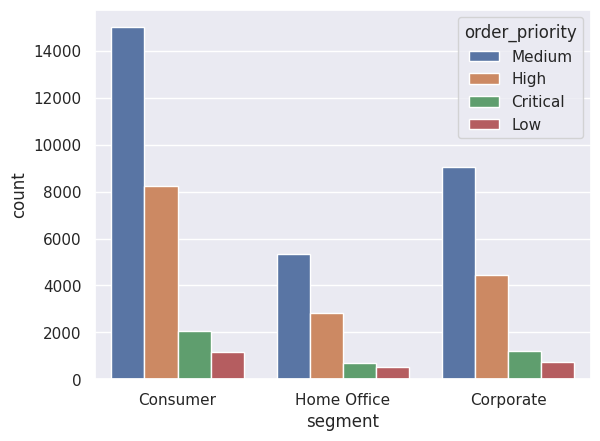

In [30]:
sns.countplot(x=train['segment'],hue=train['order_priority'])

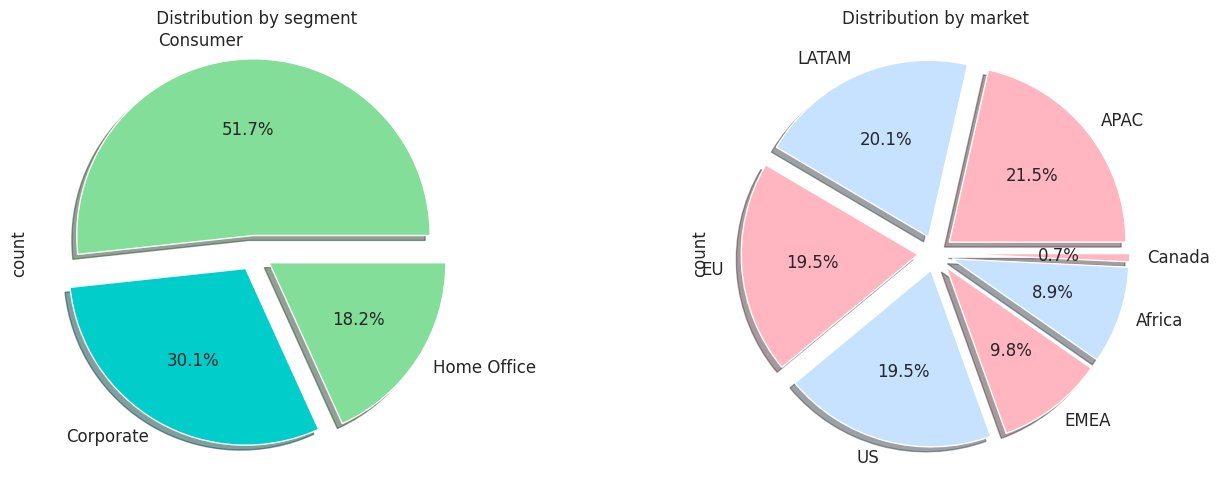

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
explode_source = [0.1] * len(train['segment'].value_counts())  # Ensure explode list matches the number of categories
g2 = train['segment'].value_counts().plot.pie(explode=explode_source, autopct='%1.1f%%', shadow=True,
                                            colors=["#82DE99", "#01CECB"], textprops={'fontsize': 12}, ax=axes[0])
g2.set_title(" Distribution by segment")

explode_dest = [0.1] * len(train['market'].value_counts())  # Ensure explode list matches the number of categories
g3 = train['market'].value_counts().plot.pie(explode=explode_dest, autopct='%1.1f%%', shadow=True,
                                                 colors=["#FFB6C1", "#C6E2FF"], textprops={'fontsize': 12}, ax=axes[1])
g3.set_title("Distribution by market")

plt.tight_layout()
plt.show()


In [32]:
train.head(2)

order_id order_date  ship_date       ship_mode    customer_name  \
0   AG-2011-2040 2011-01-01 2011-01-06  Standard Class  Toby Braunhardt   
1  IN-2011-47883 2011-01-01 2011-01-08  Standard Class      Joseph Holt   

    segment            state    country  market   region        product_id  \
0  Consumer      Constantine    Algeria  Africa   Africa  OFF-TEN-10000025   
1  Consumer  New South Wales  Australia    APAC  Oceania   OFF-SU-10000618   

          category sub_category              product_name  quantity  discount  \
0  Office Supplies      Storage       Tenex Lockers, Blue         2       0.0   
1  Office Supplies     Supplies  Acme Trimmer, High Speed         3       0.1   

    profit  shipping_cost order_priority  year    sales  Year Quarter  \
0  106.140          35.46         Medium  2011  408.300  2011  2011Q1   
1   36.036           9.72         Medium  2011  120.366  2011  2011Q1   

     Month  shiping_days rating_shipment    cost  Loss  
0  2011-01             5            Fast  302.16   0.0  
1  2011-01             7            Good   84.33   0.0

In [34]:
train.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority', 'year', 'sales', 'Year',
       'Quarter', 'Month', 'shiping_days', 'rating_shipment', 'cost', 'Loss'],
      dtype='object')

In [35]:
column_order = ['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
                'segment', 'state', 'country', 'market', 'region', 'product_id',
                'category', 'sub_category', 'product_name', 'quantity', 'discount',
                'profit', 'shipping_cost', 'order_priority', 'year', 'Year',
                'Quarter', 'Month', 'shiping_days', 'rating_shipment', 'cost', 'Loss', 'sales']

train = train[column_order]
train.head()


order_id order_date  ship_date       ship_mode    customer_name  \
0     AG-2011-2040 2011-01-01 2011-01-06  Standard Class  Toby Braunhardt   
1    IN-2011-47883 2011-01-01 2011-01-08  Standard Class      Joseph Holt   
2     HU-2011-1220 2011-01-01 2011-01-05    Second Class    Annie Thurman   
3  IT-2011-3647632 2011-01-01 2011-01-05    Second Class     Eugene Moren   
4    IN-2011-47883 2011-01-01 2011-01-08  Standard Class      Joseph Holt   

       segment            state    country  market   region        product_id  \
0     Consumer      Constantine    Algeria  Africa   Africa  OFF-TEN-10000025   
1     Consumer  New South Wales  Australia    APAC  Oceania   OFF-SU-10000618   
2     Consumer         Budapest    Hungary    EMEA     EMEA  OFF-TEN-10001585   
3  Home Office        Stockholm     Sweden      EU    North   OFF-PA-10001492   
4     Consumer  New South Wales  Australia    APAC  Oceania   FUR-FU-10003447   

          category sub_category                 product_name  quantity  \
0  Office Supplies      Storage          Tenex Lockers, Blue         2   
1  Office Supplies     Supplies     Acme Trimmer, High Speed         3   
2  Office Supplies      Storage      Tenex Box, Single Width         4   
3  Office Supplies        Paper  Enermax Note Cards, Premium         3   
4        Furniture  Furnishings   Eldon Light Bulb, Duo Pack         5   

   discount   profit  shipping_cost order_priority  year  Year Quarter  \
0       0.0  106.140          35.46         Medium  2011  2011  2011Q1   
1       0.1   36.036           9.72         Medium  2011  2011  2011Q1   
2       0.0   29.640           8.17           High  2011  2011  2011Q1   
3       0.5  -26.055           4.82           High  2011  2011  2011Q1   
4       0.1   37.770           4.70         Medium  2011  2011  2011Q1   

     Month  shiping_days rating_shipment    cost    Loss    sales  
0  2011-01             5            Fast  302.16   0.000  408.300  
1  2011-01             7            Good   84.33   0.000  120.366  
2  2011-01             4            Fast   36.48   0.000   66.120  
3  2011-01             4            Fast   70.92  26.055   44.865  
4  2011-01             7            Good   75.90   0.000  113.670

# Pre-Processing data

In [33]:
colname=[]
for t in train.columns:
  if train[t].dtypes=='object':
    colname.append(t)
colname

['order_id',
 'ship_mode',
 'customer_name',
 'segment',
 'state',
 'country',
 'market',
 'region',
 'product_id',
 'category',
 'sub_category',
 'product_name',
 'order_priority',
 'rating_shipment']

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in colname:
  train[i]=le.fit_transform(train[i])
  le_name_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
  print('feature',i)
  print('mapping', le_name_mapping)

feature order_id
mapping {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 117, 118: 118, 119:

# Correlation Matrix

In [48]:
colname_n=[]
for col in train.columns:
  if train[col].dtypes=='int64' or train[col].dtypes=='float64':
    colname_n.append(col)
colname_n


['order_id',
 'ship_mode',
 'customer_name',
 'segment',
 'state',
 'country',
 'market',
 'region',
 'product_id',
 'category',
 'sub_category',
 'product_name',
 'quantity',
 'discount',
 'profit',
 'shipping_cost',
 'order_priority',
 'year',
 'shiping_days',
 'rating_shipment',
 'cost',
 'Loss',
 'sales']

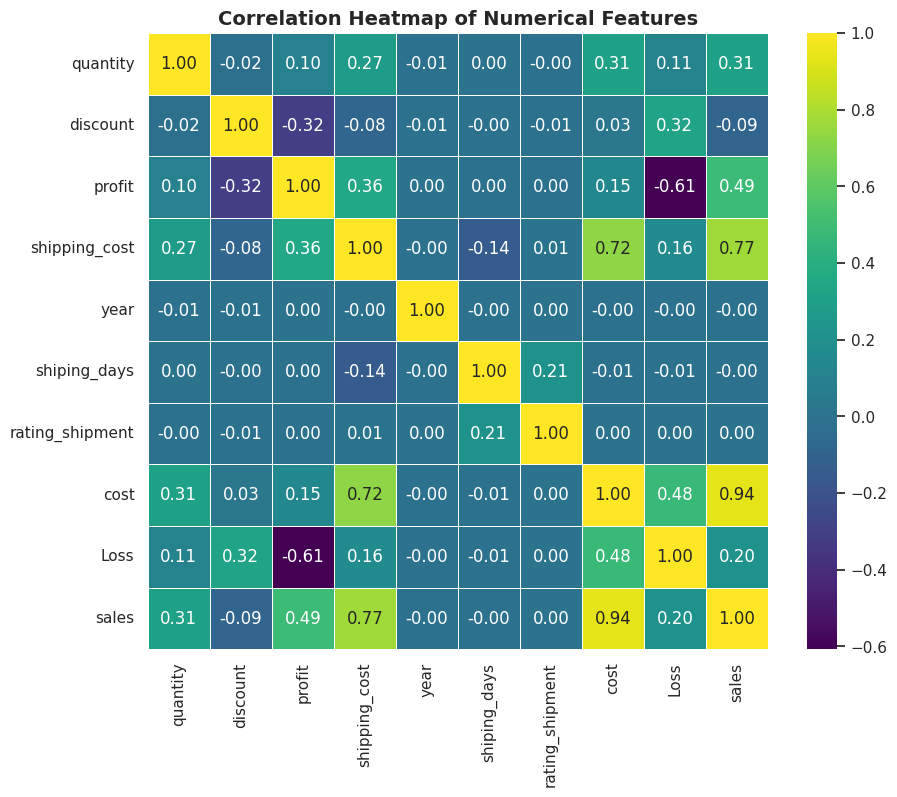

In [56]:
plt.figure(figsize=(10,8))
numerical_cols = ['quantity', 'discount', 'profit', 'shipping_cost', 'year',
                  'shiping_days', 'rating_shipment', 'cost', 'Loss', 'sales']
corr = train[numerical_cols].corr()

sns.heatmap(corr, annot=True, cmap='viridis', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight='bold')
plt.show()


Understanding Correlation Values
Correlation ranges from -1 to 1:
+1 (Yellow): Strong positive correlation (both variables increase together).
-1 (Dark Purple): Strong negative correlation (one increases, the other decreases).
0 (Blue-Green): No correlation (random relationship).
 Key Observations
 Strong Positive Correlations (Bright Yellow & Green)
A correlation of ~ 0.94 and 1.00 in some cases indicates a near-perfect relationship.
(0.94 correlation in the bottom-right section): Possibly between Sales & Profit, or Sales & Cost.
(0.77 correlation in the right-middle section): Indicates a strong dependency between two financial factors (e.g., Cost vs. Sales).
 Strong Negative Correlation (Dark Purple, -0.61)
Likely between Discount & Profit, which is expected since giving higher discounts often reduces profit margins.
 Weak or No Correlation (~0.00 to 0.10)
Some variables (e.g., Shipping Cost, Rating Shipment) do not strongly correlate with other factors.
This means they don’t have much influence on variables like Sales or Profit.
 Business Insights
 High correlation between Sales & Cost → Expected, as sales generate cost.
 Negative correlation between Discount & Profit → Giving discounts may reduce profits, so businesses should optimize discount strategies.
 Shipping Cost has a low correlation with Sales → Customers may not mind shipping costs, or it varies randomly.

# Feature Selection

In [58]:
train.head(3)

order_id order_date  ship_date  ship_mode  customer_name  segment  state  \
0         9 2011-01-01 2011-01-06          3            751        0    255   
1     10995 2011-01-01 2011-01-08          3            398        0    702   
2      9012 2011-01-01 2011-01-05          2             48        0    175   

   country  market  region  product_id  category  sub_category  product_name  \
0        2       1       0        7846         1            14          3413   
1        6       0       9        7464         1            15           168   
2       56       3       5        7858         1            14          3382   

   quantity  discount   profit  shipping_cost  order_priority  year  Year  \
0         2       0.0  106.140          35.46               3  2011  2011   
1         3       0.1   36.036           9.72               3  2011  2011   
2         4       0.0   29.640           8.17               1  2011  2011   

  Quarter    Month  shiping_days  rating_shipment    cost  Loss    sales  
0  2011Q1  2011-01             5                0  302.16   0.0  408.300  
1  2011Q1  2011-01             7                2   84.33   0.0  120.366  
2  2011Q1  2011-01             4                0   36.48   0.0   66.120

In [60]:
train.drop(columns=['order_date','ship_date','year','Year','Quarter','Month'],axis=1,inplace=True)

# Splitting our data into Training and Testing

In [66]:
X=train.iloc[:,0:-1]
Y=train.iloc[:,-1]

In [67]:
print(X.shape)
print(Y.shape)

(51290, 21)
(51290,)


# Scaling data

In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test,=train_test_split(X,Y, test_size=0.2,random_state=42)

In [79]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(41032, 21)
(41032,)
(10258, 21)
(10258,)


In [91]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [92]:
models={"Linear Regression":LinearRegression(),
        "DecisionTreeRegressor":DecisionTreeRegressor(),
        "RandomForestRegressor":RandomForestRegressor(),
        "GradientBoostingregressor":GradientBoostingRegressor(),
        "AdaBoostRegressor":AdaBoostRegressor(),
        "XgboostRegressor":XGBRegressor(),
        "ExtraTressRegressor":ExtraTreesRegressor(),
        "SVR":SVR(),
        "KNeighborsRegressor":KNeighborsRegressor()}

results={}

# Train and Evaluvate models
for name,model in models.items():
  model.fit(X_train,Y_train)
  y_pred=model.predict(X_test)

# Metrics
  mse=mean_squared_error(Y_test,y_pred)
  rmse=np.sqrt(mse)
  r2=r2_score(Y_test,y_pred)
  mae=mean_absolute_error(Y_test,y_pred)
  mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100

# Adjusted R-sqaured
  n=len(X_test)
  p=X_test.shape[1]
  adj_r2=1-(1-r2) * (n-1) / (n- p- 1) if n > p + 1 else None



  results[name]={"MSE":mse, "RMSE":rmse,"R2":r2,"MAE":mae,"MAPE":mape,"Adj_R2":adj_r2}

  print(f"\nModel: {name}")
  print(f'Mean Sqaured Error: {mse:.4f}')
  print(f'Root Mean Sqaured Error {rmse:.4f}')
  print(f'Mean Absolute Error {mae:4f}')
  print(f'R- Squared {r2:.4f}')
  print(f'Adjusted R-sqaured {adj_r2:.4f}')


Model: Linear Regression
Mean Sqaured Error: 0.0000
Root Mean Sqaured Error 0.0000
Mean Absolute Error 0.000000
R- Squared 1.0000
Adjusted R-sqaured 1.0000

Model: DecisionTreeRegressor
Mean Sqaured Error: 4279.8765
Root Mean Sqaured Error 65.4208
Mean Absolute Error 6.946057
R- Squared 0.9825
Adjusted R-sqaured 0.9825

Model: RandomForestRegressor
Mean Sqaured Error: 1388.8786
Root Mean Sqaured Error 37.2677
Mean Absolute Error 3.201127
R- Squared 0.9943
Adjusted R-sqaured 0.9943

Model: GradientBoostingregressor
Mean Sqaured Error: 1015.0594
Root Mean Sqaured Error 31.8600
Mean Absolute Error 10.153555
R- Squared 0.9959
Adjusted R-sqaured 0.9958

Model: AdaBoostRegressor
Mean Sqaured Error: 102675.1094
Root Mean Sqaured Error 320.4296
Mean Absolute Error 293.347321
R- Squared 0.5803
Adjusted R-sqaured 0.5794

Model: XgboostRegressor
Mean Sqaured Error: 7405.6398
Root Mean Sqaured Error 86.0560
Mean Absolute Error 10.528171
R- Squared 0.9697
Adjusted R-sqaured 0.9697

Model: ExtraTre

In [ ]:
# Define Gradient Boosting model
gbr = GradientBoostingRegressor()

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'max_depth': [3, 5, 7],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples to split a node
    'min_samples_leaf': [1, 3, 5]  # Min samples in a leaf
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, Y_train)

# Print best parameters & best score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score (Cross-Validation):", grid_search.best_score_)

# Use the best estimator for predictions
best_gbr = grid_search.best_estimator_
y_pred = best_gbr.predict(X_test)

# Evaluate the fine-tuned model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nFine-Tuned Gradient Boosting Regressor Metrics:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

# -- Visualization ---

# Actual vs Predicted Values Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color="red", linestyle="dashed")  # Perfect fit line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Gradient Boosting)")
plt.show()

#  Residual Plot (Error Analysis)
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.axvline(x=0, color="red", linestyle="dashed")  # Reference line at zero
plt.xlabel("Residuals (Error)")
plt.title("Residual Distribution")
plt.show()

#  Feature Importance Plot
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_gbr.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")
plt.title("Feature Importance (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
